Nama = Anas Fikri Hanif\
SIB ID = M183X0321

**Import Library**

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile, os
import shutil
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from sklearn.model_selection import train_test_split

**Preparing Dataset from Kaggle**

In [1]:
# Install kaggle 
!pip install -q kaggle

In [3]:
# Token API
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
# Receive dataset config
!chmod 600 /content/kaggle.json

In [5]:
# Download dataset
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d prasunroy/natural-images

 99% 339M/342M [00:02<00:00, 150MB/s]
100% 342M/342M [00:02<00:00, 162MB/s]


In [8]:
# extract dataset
local_zip = '/content/natural-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

**Data Information**

In [24]:
def list_files(path):
  files_num = 0
  for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * (level)
    files_num += len(files)
    print('{}{}/ {}'.format(indent, os.path.basename(root), (str(len(files)) + ' images' if len(files) > 0 else '')))
  
  return files_num

In [25]:
base_dir = '/content/natural_images/'
list_files(base_dir)

/ 
motorbike/ 788 images
fruit/ 1000 images
cat/ 885 images
flower/ 843 images
airplane/ 727 images
dog/ 702 images
car/ 968 images
person/ 986 images


6899

**Delete Unused Data**

In [27]:
# Use flower, person, cat, fruit
!rm -rf '/content/natural_images/airplane'
!rm -rf '/content/natural_images/car'
!rm -rf '/content/natural_images/motorbike'
!rm -rf '/content/natural_images/dog'

**Check Image File Size**

In [28]:
# make a read_files function
def read_files(path):
  image_files = []
  for dirname, dirnames, filenames in os.walk(path):
    for filename in filenames:
      image_files.append(os.path.join(dirname, filename))
  
  return image_files

In [36]:
# check image size on entire folder
full_directory = read_files(base_dir)
image_sizes = []
for file in full_directory:
  image = PIL.Image.open(file)
  width, height = image.size
  image_sizes.append(f'{width}x{height}')

unique_sizes = set(image_sizes)

print(f'Image size list (first 15 unique size): \n{list(unique_sizes)[:15]}')

Image size list (first 15 unique size): 
['227x175', '143x180', '290x269', '432x224', '189x100', '203x121', '394x405', '167x176', '194x106', '1000x460', '184x110', '307x459', '346x472', '386x376', '462x345']


**Create Directory for Splitting Data**

In [37]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [40]:
cat_dir = os.path.join(base_dir, 'cat')
flower_dir = os.path.join(base_dir, 'flower')
fruit_dir = os.path.join(base_dir, 'fruit')
person_dir = os.path.join(base_dir, 'person')

In [41]:
# crate train and val directory
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [42]:
# train
cat_train = os.path.join(train_dir, 'car')
flower_train = os.path.join(train_dir, 'flower')
fruit_train = os.path.join(train_dir, 'fruit')
person_train = os.path.join(train_dir, 'person')

In [43]:
# validation
cat_val = os.path.join(validation_dir, 'cat')
flower_val = os.path.join(validation_dir, 'flower')
fruit_val = os.path.join(validation_dir, 'fruit')
person_val = os.path.join(validation_dir, 'person')

In [44]:
# create train and val directory for each file
os.mkdir(cat_train)
os.mkdir(flower_train)
os.mkdir(fruit_train)
os.mkdir(person_train)
os.mkdir(cat_val)
os.mkdir(flower_val)
os.mkdir(fruit_val)
os.mkdir(person_val)

**Splitting Train and Test**

In [45]:
# test size 20%
cat_train_dir, cat_val_dir = train_test_split(os.listdir(cat_dir), test_size=0.20)
flower_train_dir, flower_val_dir = train_test_split(os.listdir(flower_dir), test_size=0.20)
fruit_train_dir, fruit_val_dir = train_test_split(os.listdir(fruit_dir), test_size=0.20)
person_train_dir, person_val_dir = train_test_split(os.listdir(person_dir), test_size=0.20)

In [46]:
# copy file for each train and val directory
for file in cat_train_dir:
  shutil.copy(os.path.join(cat_dir, file), os.path.join(cat_train, file))
for file in flower_train_dir:
  shutil.copy(os.path.join(flower_dir, file), os.path.join(flower_train, file))
for file in fruit_train_dir:
  shutil.copy(os.path.join(fruit_dir, file), os.path.join(fruit_train, file))
for file in person_train_dir:
  shutil.copy(os.path.join(person_dir, file), os.path.join(person_train, file))
for file in cat_val_dir:
  shutil.copy(os.path.join(cat_dir, file), os.path.join(cat_val, file))
for file in flower_val_dir:
  shutil.copy(os.path.join(flower_dir, file), os.path.join(flower_val, file))
for file in fruit_val_dir:
  shutil.copy(os.path.join(fruit_dir, file), os.path.join(fruit_val, file))
for file in person_val_dir:
  shutil.copy(os.path.join(person_dir, file), os.path.join(person_val, file))

**Augmentation & Image Generator**

In [47]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [48]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100,100),
    batch_size = 4,
    class_mode = 'categorical' 
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (100,100),
    batch_size = 4,
    class_mode = 'categorical'
)

Found 2970 images belonging to 4 classes.
Found 744 images belonging to 4 classes.


**Callback**

In [57]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.93) and (logs.get('val_accuracy')>=0.93):
      print('\nAkurasi train dan test telah mencapai 93% !')
      self.model.stop_training = True
callbacks = myCallbacks()

**Create & Fit the Model**

In [49]:
# create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [50]:
# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [52]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [58]:
# fit the model
epoch = 50
history = model.fit(
    train_generator,
    steps_per_epoch = 30,
    epochs = epoch,
    validation_data = validation_generator,
    validation_steps = 20,
    verbose = 2,
    callbacks = [callbacks]
)

Epoch 1/50
30/30 - 5s - loss: 0.1351 - accuracy: 0.9500 - val_loss: 0.3727 - val_accuracy: 0.8750 - 5s/epoch - 173ms/step
Epoch 2/50
30/30 - 5s - loss: 0.0727 - accuracy: 0.9750 - val_loss: 0.4528 - val_accuracy: 0.8375 - 5s/epoch - 174ms/step
Epoch 3/50
30/30 - 5s - loss: 0.1290 - accuracy: 0.9500 - val_loss: 0.6955 - val_accuracy: 0.8125 - 5s/epoch - 175ms/step
Epoch 4/50
30/30 - 5s - loss: 0.1226 - accuracy: 0.9667 - val_loss: 0.3538 - val_accuracy: 0.9125 - 5s/epoch - 171ms/step
Epoch 5/50
30/30 - 5s - loss: 0.0714 - accuracy: 0.9833 - val_loss: 0.2545 - val_accuracy: 0.9000 - 5s/epoch - 171ms/step
Epoch 6/50

Akurasi train dan test telah mencapai 93% !
30/30 - 5s - loss: 0.0851 - accuracy: 0.9750 - val_loss: 0.1931 - val_accuracy: 0.9500 - 5s/epoch - 172ms/step


**Training and Testing Accuracy & Loss Plot**

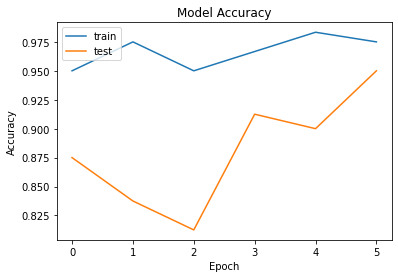

In [59]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

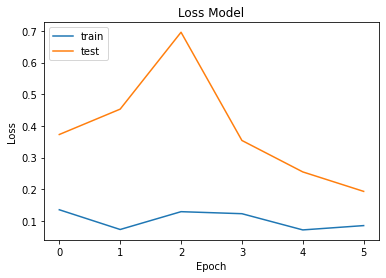

In [60]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

**TFLite Formatting**

In [61]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

In [62]:
with tf.io.gfile.GFile('model_v1.tflite', 'wb') as f:
  f.write(tflite_model)